In [33]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv") 
print(df.head())  

   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [34]:
features = ['Age', 'Annual_Income_(k$)', 'Spending_Score']  
X = df[features]

In [35]:
X = X.dropna()

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\DC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:

print(df['Cluster'].value_counts())


print(df.groupby('Cluster')[features].mean())

1    54
4    47
2    40
3    39
0    20
Name: Cluster, dtype: int64
               Age  Annual_Income_(k$)  Spending_Score
Cluster                                               
0        46.250000           26.750000       18.350000
1        25.185185           41.092593       62.240741
2        32.875000           86.100000       81.525000
3        39.871795           86.102564       19.358974
4        55.638298           54.382979       48.851064


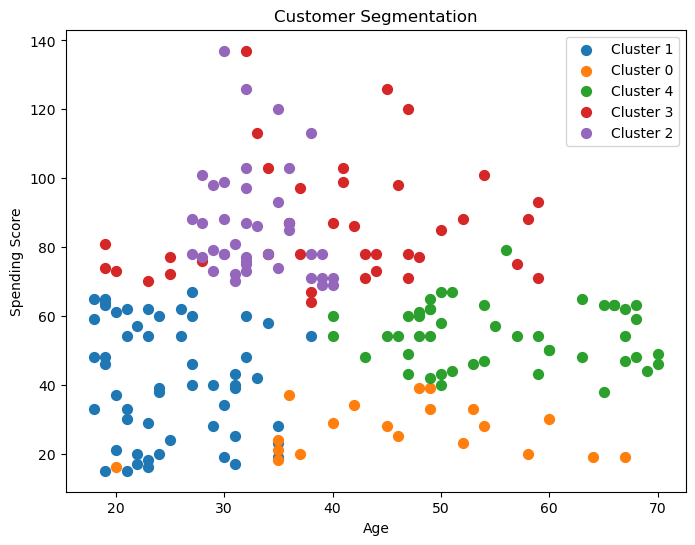

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Annual_Income_(k$)'], label=f'Cluster {cluster}', s=50)

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.legend()
plt.show()